<a href="https://colab.research.google.com/github/A-Burnhard/Mall-Customer-Segmentation/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Loading or importing  mall customer segmentation dataset to notebook
mall_data = pd.read_csv("Mall_Customers.csv")
label_encoder = LabelEncoder()
mall_data["Gender"] = label_encoder.fit_transform(mall_data["Gender"])
mall_data.head()

**Preprocessing**


**Identifying Missing values**

In [ ]:
# Identify missing values
missing_values = mall_data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Identifying Duplicates**

In [ ]:
# Identify duplicate rows
duplicates = mall_data.duplicated()
print("Duplicates instances: \n",duplicates)

**Outlier Detection using Boxplot**

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = mall_data

# Visualize the distribution of each feature using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

# Identify outliers using statistical methods (e.g., Z-score or IQR)
# Z-score method
from scipy.stats import zscore

#data = mall_data.drop("class", axis=1)
z_scores = zscore(data)
outlier_threshold = 3  # Adjust the threshold as per your preference
outliers = (abs(z_scores) > outlier_threshold).any(axis=1)

# IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Count the number of outliers
num_outliers = outliers.sum()
print(f"Number of outliers: {num_outliers}")

# Decide whether to remove outliers or transform them
remove_outliers = False

if remove_outliers:
    # Remove outliers from the dataset
    data = data[~outliers]
    print("Outliers removed.")
else:
    # Transform outliers to a specific value
    outlier_value = 200  # Choose an appropriate value for transformation
    data[outliers] = outlier_value
    print("Outliers transformed.")

# Updated visualization after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Features (After Outlier Handling)')
plt.show()

mall_data = data


**others**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope

# Load the mall customer segmentation dataset
df = mall_data

# Drop irrelevant columns (e.g., CustomerID)
#df.drop(columns=['CustomerID'], inplace=True)

# Standardize the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Perform PCA for visualization purposes (you can skip this step if the dataset has only 2-3 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters for visualization
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()

# Use Elliptic Envelope to detect influential data points
outlier_detector = EllipticEnvelope(contamination=0.05)  # Adjust the contamination level as needed
influential_data_points = outlier_detector.fit_predict(X_scaled)

# Add the influential data point labels to the dataframe
df['Influential'] = influential_data_points

# Display the data points identified as influential
print("Influential Data Points:")
print(df[df['Influential'] == -1])

# Optionally, you can save the updated DataFrame to a new CSV file
# df.to_csv("mall_customer_segmentation_with_influential.csv", index=False)


**Defining X and Y values**

In [ ]:
# Separate the target variable (class) from the features
X = mall_data.drop('class', axis=1)
y = mall_data['class']

# Convert the target variable to numeric labels
label_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = y.map(label_mapping)

**Influencial datapoint detection using elliptic envelope**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope

# Load the mall customer segmentation dataset
df = mall_data

# Drop irrelevant columns (e.g., CustomerID)
#df.drop(columns=['CustomerID'], inplace=True)

# Standardize the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Perform PCA for visualization purposes (you can skip this step if the dataset has only 2-3 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters for visualization
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()

# Use Elliptic Envelope to detect influential data points
outlier_detector = EllipticEnvelope(contamination=0.05)  # Adjust the contamination level as needed
influential_data_points = outlier_detector.fit_predict(X_scaled)

# Add the influential data point labels to the dataframe
df['Influential'] = influential_data_points

# Display the data points identified as influential
print("Influential Data Points:")
print(df[df['Influential'] == -1])

# Optionally, you can save the updated DataFrame to a new CSV file
# df.to_csv("mall_customer_segmentation_with_influential.csv", index=False)


**Normality of the set of features using shapiro**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the Mall Customer Segmentation dataset
df = mall_data

# List of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns

# Check the normality of each numerical feature
for feature in numerical_features:
    # Shapiro-Wilk test for normality
    stat, p = stats.shapiro(df[feature])
    alpha = 0.05

    print(f"Feature: {feature}")
    print(f"Shapiro-Wilk test statistic: {stat}")
    print(f"P-value: {p}")

    if p > alpha:
        print("The feature is normally distributed.")
    else:
        print("The feature is not normally distributed.")

    # Visualize the distribution using a histogram and Q-Q plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} - Histogram")

    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], plot=plt)
    plt.title(f"{feature} - Q-Q Plot")

    plt.tight_layout()
    plt.show()


**Data transformation**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X,y

# Separate the target variable (class) from the features

# Perform normalization using Min-Max scaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Perform standardization using StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print(X)

**Feature Selection**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Generate the mall customer segmentation dataset
data, labels = make_blobs(n_samples=200, centers=4, random_state=42, cluster_std=2.5)

# Create a Pandas DataFrame and visualize the data
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
plt.scatter(df['Feature1'], df['Feature2'], s=50, cmap='viridis')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Mall Customer Segmentation Dataset')
plt.show()

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply KMeans clustering to the dataset
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clustered data
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], s=50, cmap='viridis')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Clustered Mall Customer Segmentation Dataset')
plt.show()

# Feature selection using Recursive Feature Elimination (RFE)
X = df.drop('Cluster', axis=1)
y = df['Cluster']

# Use Logistic Regression as the estimator for RFE
estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=1)
rfe.fit(X, y)

# Get the ranking of features based on RFE
feature_ranks = rfe.ranking_
print("Feature Ranks based on RFE:")
for rank, feature in zip(feature_ranks, X.columns):
    print(f"Feature: {feature}, Rank: {rank}")


**Oversampling techniques using the Synthetic Minority Over-sampling Technique (SMOTE) to balance the imbalanced dataset**

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE


# Create a SMOTE object
smote = SMOTE()

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the balanced class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())


**Selecting Appropriate Learners for Training and Validation (K means and agglomerative clustering)**

**K-Means clustering with K-fold cross-validation**

In [ ]:
from sklearn.preprocessing import StandardScaler
df = mall_data
# Select features for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Standardize the features for better performance of K-means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**K means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

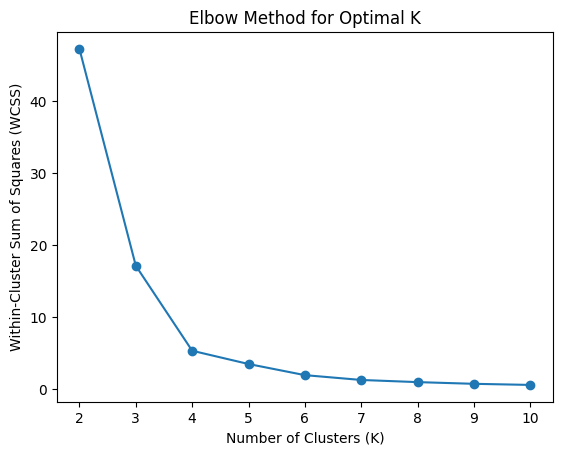

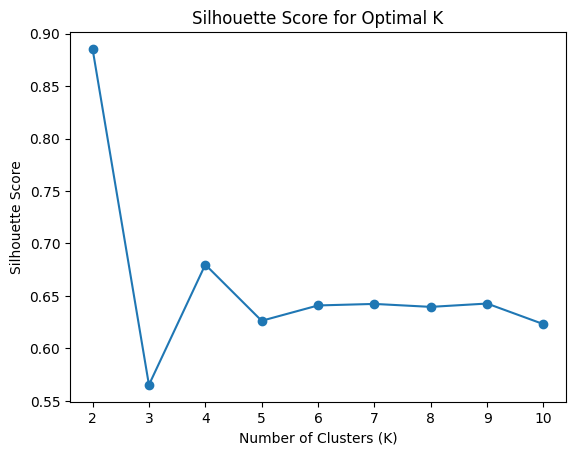

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try different values of K and evaluate using WCSS and Silhouette Score
k_values = range(2, 11)
wcss_scores = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    wcss_scores.append(kmeans.inertia_)  # WCSS is available as inertia_ in KMeans
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the Elbow Method to determine optimal K based on WCSS
import matplotlib.pyplot as plt

plt.plot(k_values, wcss_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Plot Silhouette Score to determine optimal K
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()


**Hierachical clustering using agglomerative clusutering**

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform Hierarchical Clustering with different linkage methods
methods = ['ward', 'complete', 'average']
for method in methods:
    Z = linkage(X_scaled, method=method)

    # Plot the dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram(Z, p=5, truncate_mode='level')
    plt.title(f"Hierarchical Clustering Dendrogram ({method} linkage)")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


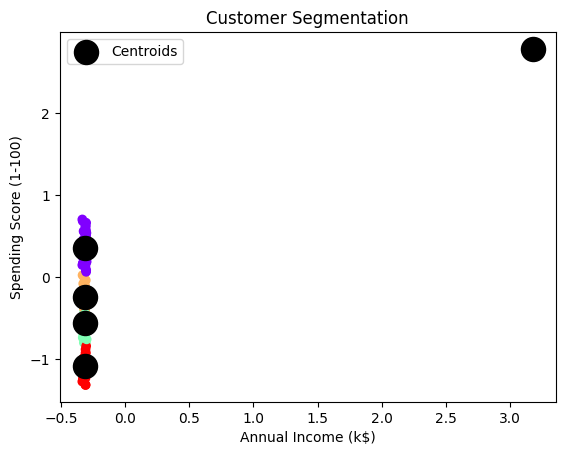

In [ ]:
# Finalize the model based on the optimal K or linkage method
# For example, if the optimal K is 5 for K-means
kmeans_final = KMeans(n_clusters=5, random_state=42)
kmeans_final.fit(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_final.labels_, cmap='rainbow')
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation")
plt.legend()
plt.show()
